<a href="https://colab.research.google.com/github/devghai/SuicideResearch/blob/main/SuicideVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Visualizing Suicide Rates**





##**Why Explore Suicide Rates?**

- **Visualization** lets people **grasp data**
- **People are more than a statistic**
- **Observations** can lead to **awareness**



##**About the Data Set**

- **Included Features:**
   - country
   - year
   - total suicides
   - suicides per 100k people
   - Human Development Index
   - GDP per capita

##Data Wrangling & Summary


In [ ]:
#import python libraries 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import scipy

%matplotlib inline


In [ ]:
#initialize
data = pd.read_csv('master.csv')
data.describe()


,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


##Suicides and Gender

Text(0.5, 1.0, 'Total Number of Suicides Categorized by Age and Country')

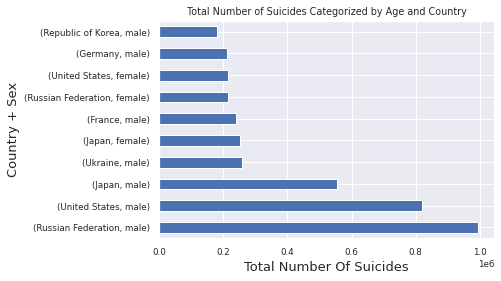

In [ ]:
data.groupby(['country','sex']).suicides_no.sum().nlargest(10).plot(kind='barh')
plt.xlabel("Total Number Of Suicides", fontsize=13)
plt.ylabel("Country + Sex", fontsize=13)
plt.title('Total Number of Suicides Categorized by Age and Country')


Text(0.5, 1.0, 'Total Number of Suicides Categorized by Age and Sex')

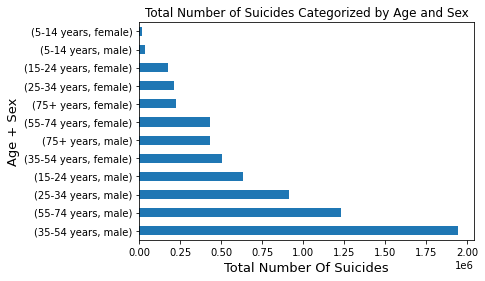

In [ ]:
data.groupby(['age','sex']).suicides_no.sum().nlargest(15).plot(kind='barh')
plt.xlabel("Total Number Of Suicides", fontsize=13)
plt.ylabel("Age + Sex", fontsize=13)
plt.title('Total Number of Suicides Categorized by Age and Sex')


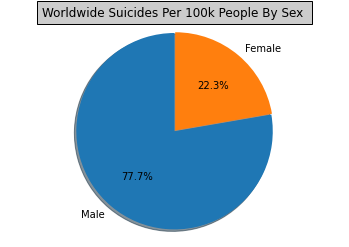

In [ ]:
labels = 'Male', 'Female'
sizes = [20.72, 5.94]
explode = (0, 0.01)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')
plt.title("Worldwide Suicides Per 100k People By Sex ", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

## Top and Bottom 15 countries: 

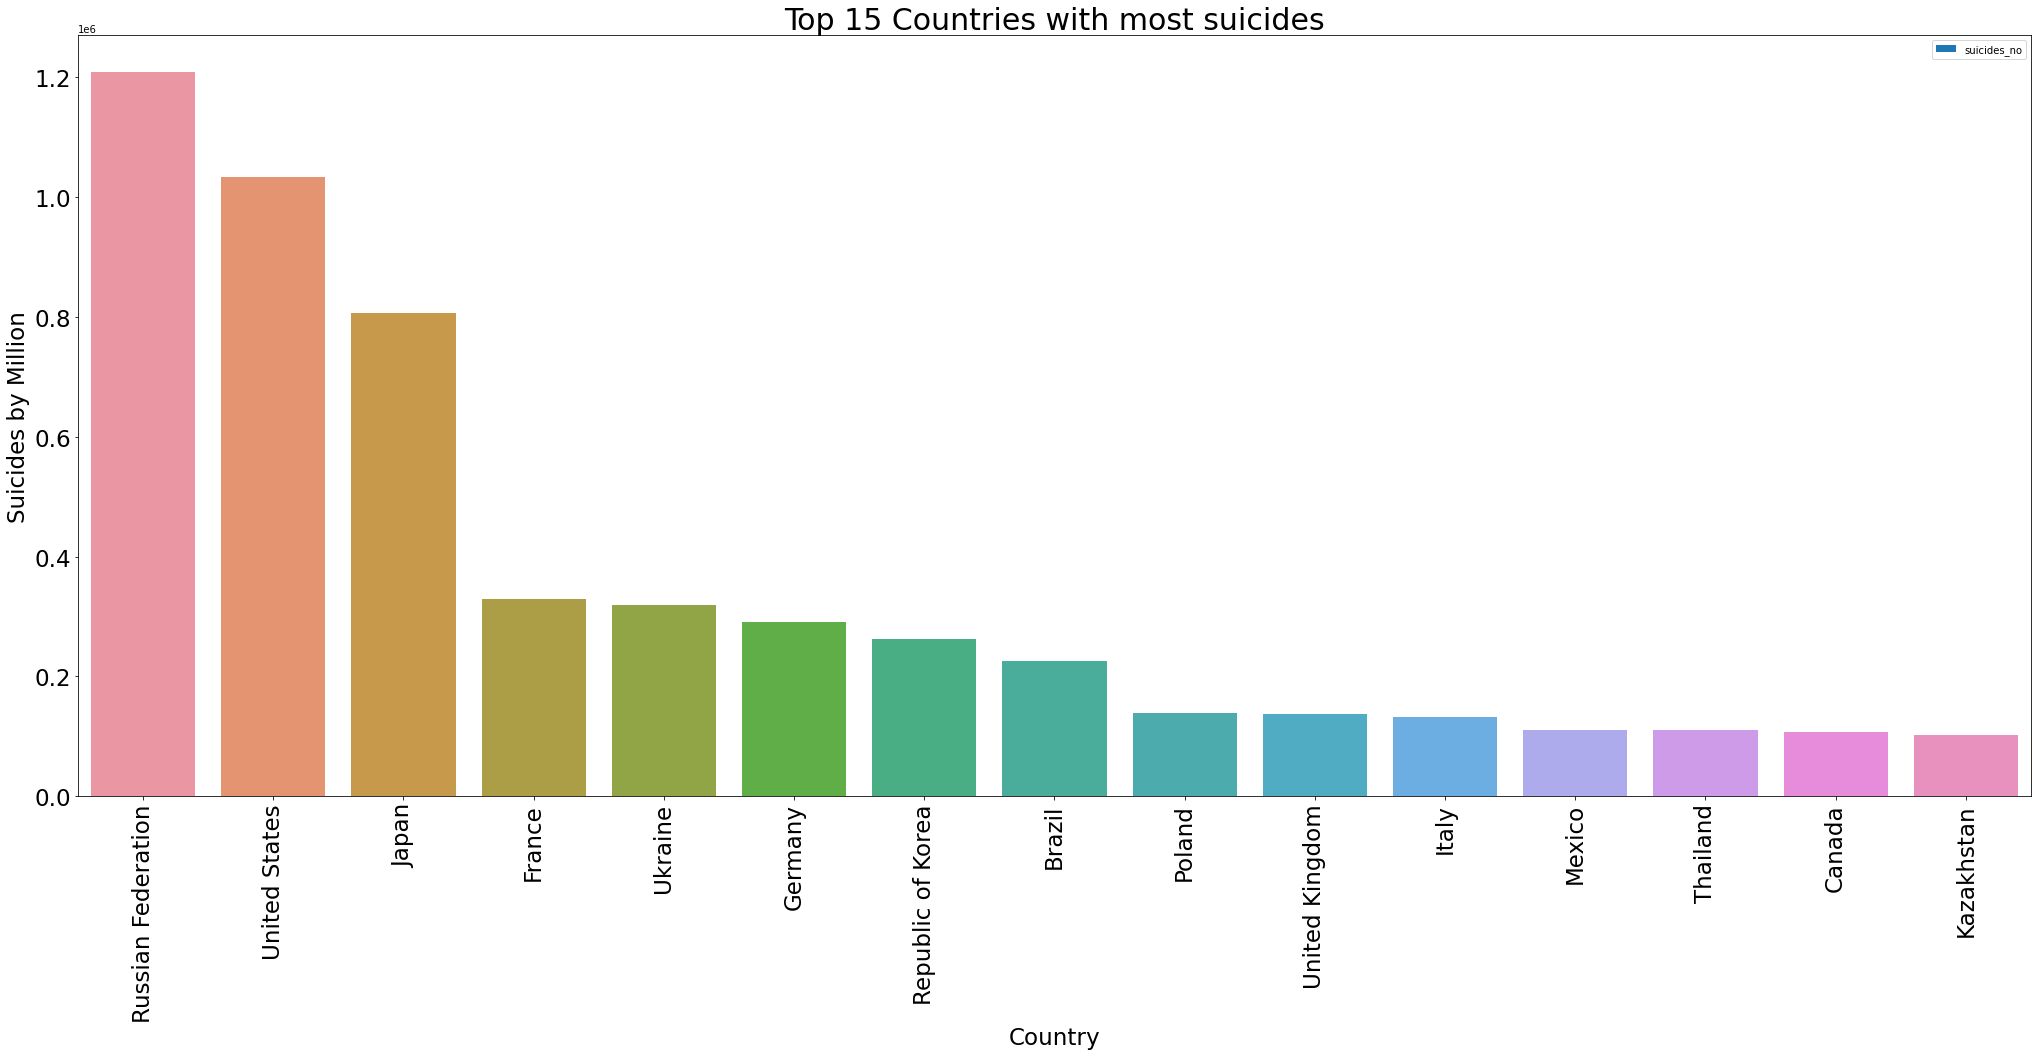

In [ ]:
country_suicides = data[['country','suicides_no']].groupby(['country']).sum()
country_suicides.plot(kind='bar', figsize=(35,14), fontsize=23)

#Contries with the most suicides
country_suicides = country_suicides.reset_index().sort_values(by='suicides_no', ascending=False)
top15 = country_suicides[:15]
sns.barplot(x='country', y='suicides_no', data=top15).set_title('Top 15 Countries with most suicides', fontsize=30)
plt.xticks(rotation=90)
plt.xlabel("Country", fontsize=23)
plt.ylabel("Suicides by Million", fontsize=23)
plt.rcParams['axes.facecolor'] = 'white'
plt.style.use('default')

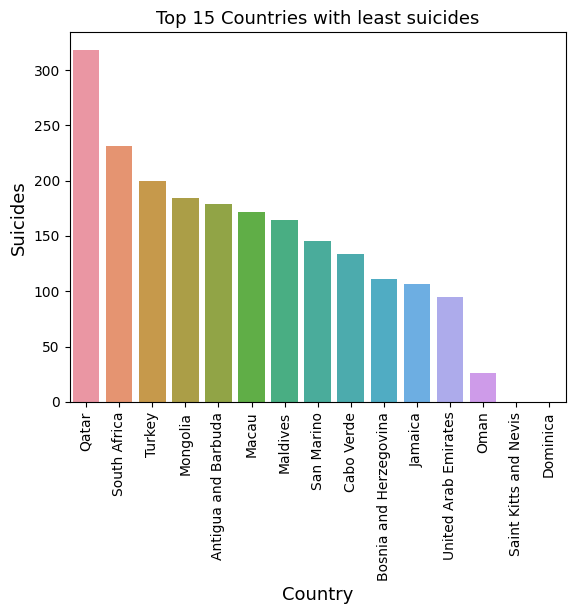

In [ ]:
country_suicides = data[['country','suicides/100k pop']].groupby(['country']).sum()
#country_suicides.plot(kind='bar', figsize=(35,14), fontsize=23)

#Contries with the most suicides
country_suicides = country_suicides.reset_index().sort_values(by='suicides/100k pop', ascending=False)
bottom15 = country_suicides[-15:]
sns.barplot(x='country', y='suicides/100k pop', data=bottom15).set_title('Top 15 Countries with least suicides', fontsize=13)
plt.xticks(rotation=90)
plt.xlabel("Country", fontsize=13)
plt.ylabel("Suicides", fontsize=13)
plt.rcParams['axes.facecolor'] = 'white'
plt.style.use('default')
#rom matplotlib.pyplot import figure
#figure(num=None, figsize=(35, 14), dpi=80, facecolor='w', edgecolor='k')

##Generations & Suicides






Text(0.5, 1.0, 'Suicides vs generations per year')

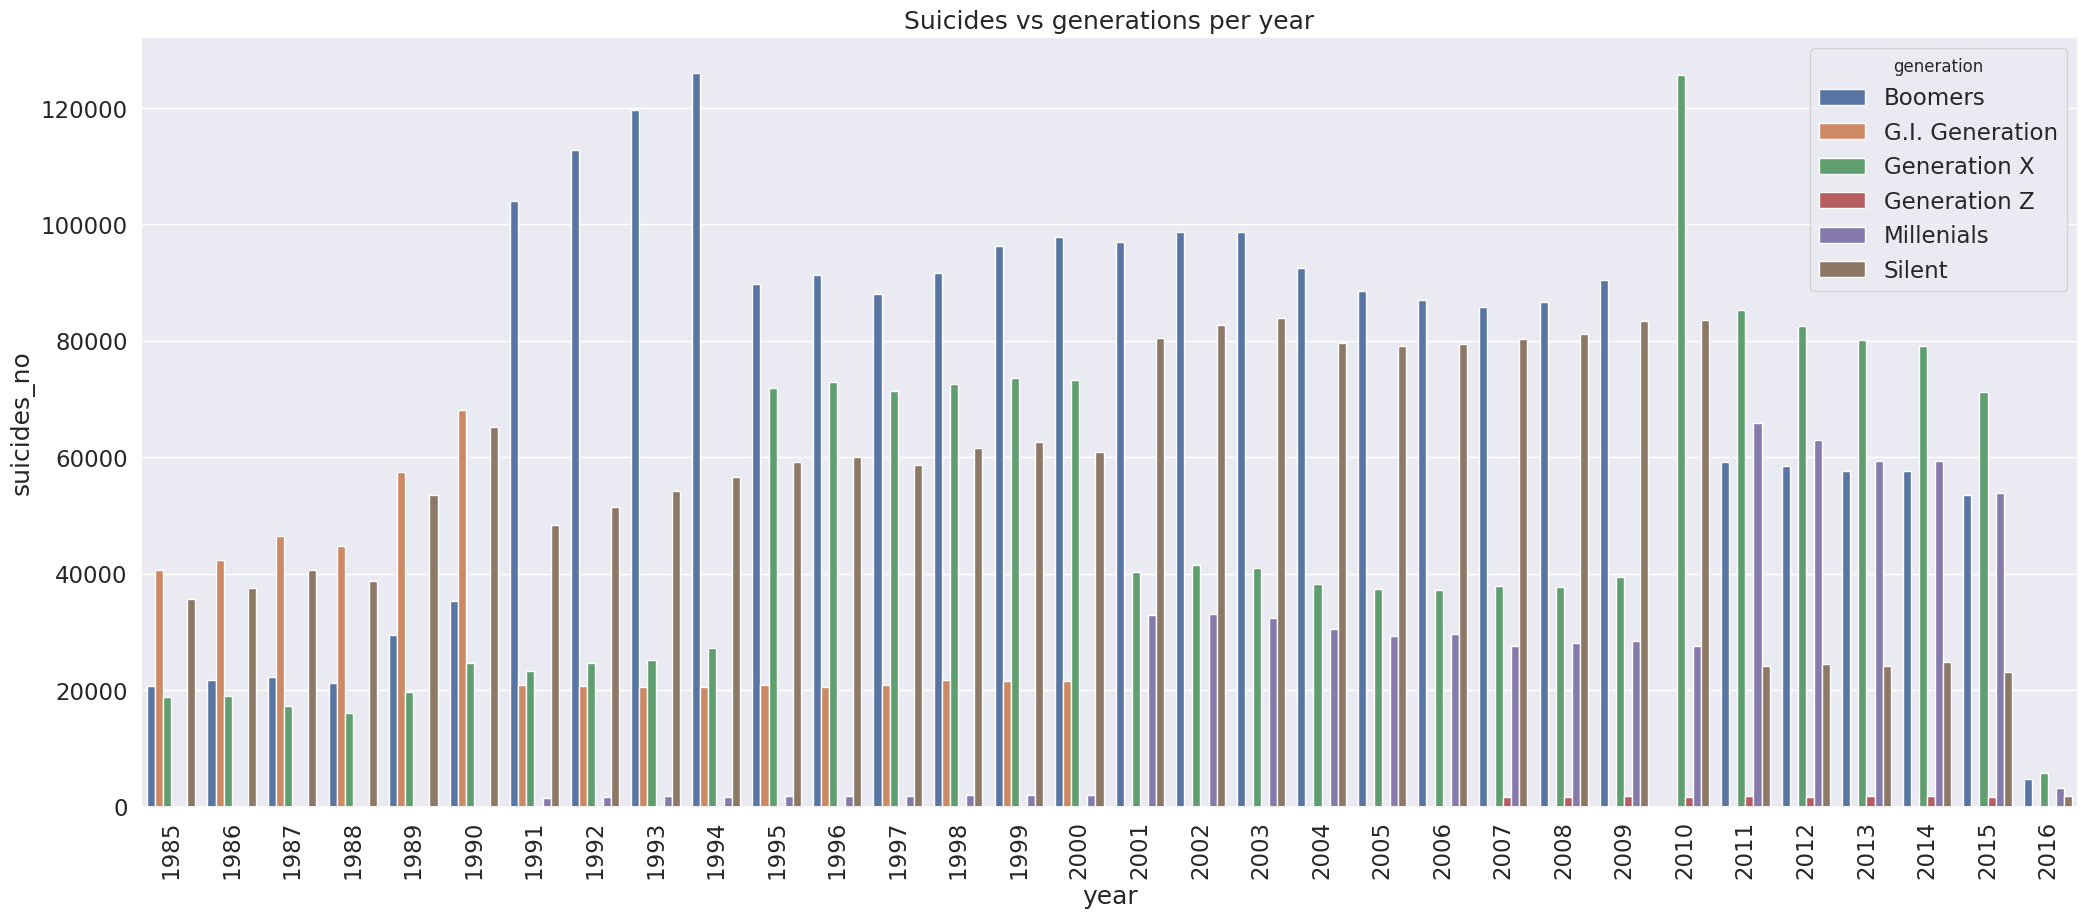

In [ ]:
gen_year = data[['suicides_no','generation','year']].groupby(['generation','year']).sum().reset_index()
plt.figure(figsize=(25,10))
sns.set(font_scale=1.5)
plt.xticks(rotation=90)
sns.barplot(y='suicides_no', x='year', hue='generation', data=gen_year, palette='deep').set_title('Suicides vs generations per year')

##Suicides vs Time






In [ ]:
United_States = data.loc[data.loc[:, 'country']=='United States',:]
Russia = data.loc[data.loc[:, 'country']=='Russian Federation',:]
Slovenia = data.loc[data.loc[:, 'country']=='Slovenia',:]
Korea = data.loc[data.loc[:, 'country']=='Republic of Korea',:]
Mexico = data.loc[data.loc[:, 'country']=='Mexico',:]
Japan = data.loc[data.loc[:, 'country']=='Japan',:]

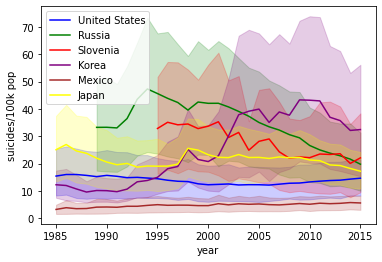

In [ ]:
p = sns.lineplot(x='year', y='suicides/100k pop', data=United_States, color='blue')
q = sns.lineplot(x='year', y='suicides/100k pop', data=Russia, color = 'green')
r = sns.lineplot(x='year', y='suicides/100k pop', data=Slovenia, color = 'red')
s = sns.lineplot(x='year', y='suicides/100k pop', data=Korea, color= 'purple')
t = sns.lineplot(x='year', y='suicides/100k pop', data=Mexico, color= 'brown')
u = sns.lineplot(x='year', y='suicides/100k pop', data=Japan, color = 'yellow')
plt.legend(['United States', 'Russia', 'Slovenia', 'Korea', 'Mexico', 'Japan'])

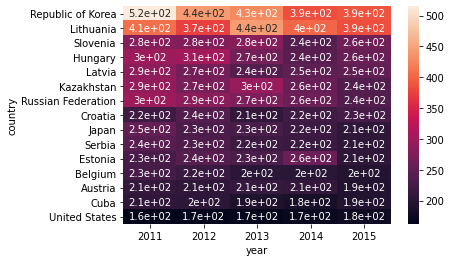

In [ ]:
p = pd.crosstab(index=data.country,columns=data.year,values=data['suicides/100k pop'],aggfunc='sum')

sns.heatmap(p.loc[:,2011:2015].sort_values(2015, ascending=False).dropna().head(15),annot=True)

pp = pd.crosstab(index=data.country,columns=data.year,values=data.population,aggfunc='sum')

pdivpp = p/pp*10000

##Suicides & Human Development Index 

Text(0.5, 0, 'HDI for Year')

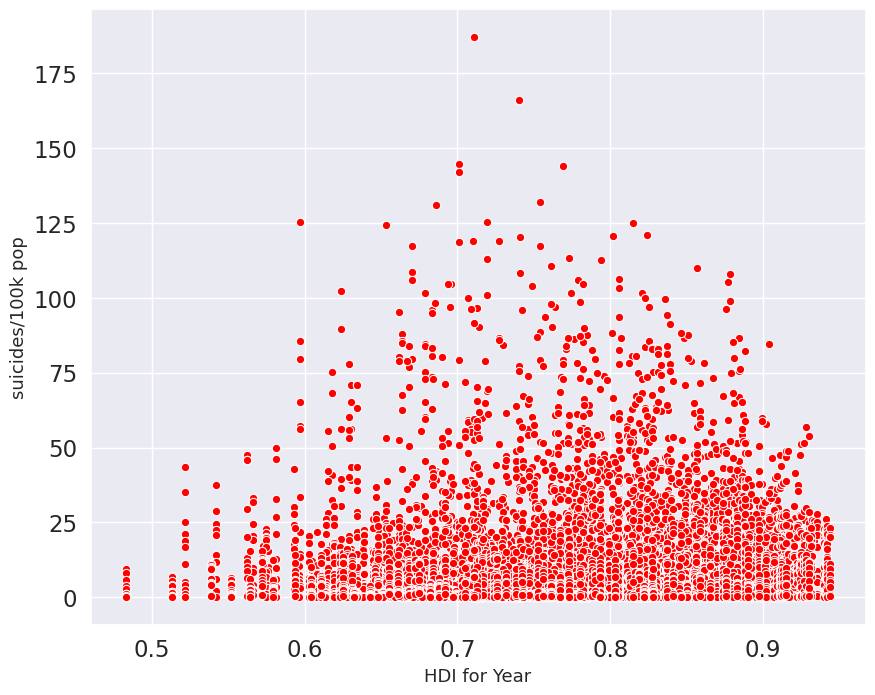

In [ ]:
f, ax = plt.subplots(1,1, figsize=(10,8))
ax = sns.scatterplot(x="HDI for year", y="suicides/100k pop", data=data, color='red')
plt.ylabel("suicides/100k pop", fontsize=13)
plt.xlabel("HDI for Year", fontsize=13)

##Suicides & GDP Per Capita

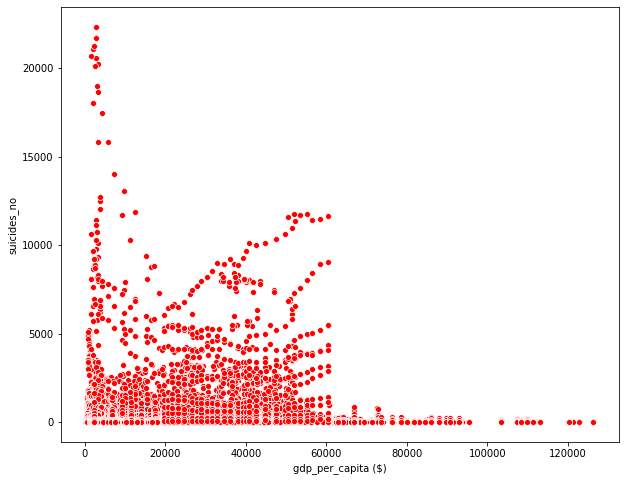

In [ ]:
f, ax = plt.subplots(1,1, figsize=(10,8))
ax = sns.scatterplot(x="gdp_per_capita ($)", y="suicides_no", data=data, color='red')

##**Final Thoughts**



### Limitations of the Data:

- Dates aren't specific
- No account for inflation
- Lack of transparency

[CIA World Factbook](https://www.cia.gov/library/publications/the-world-factbook/)


###Room for Future Analysis

- Implications of **society becoming** more **socially aware**
- implications of **domestic violence** and **cabin fever** due to **COVID-19**





[Society and Social Awareness](https://www.forbes.com/sites/wesgay/2017/08/11/millennials-social-responsibility/#e403afb17d88)


[COVID-19 and Domestic Violence](https://www.cfr.org/in-brief/double-pandemic-domestic-violence-age-covid-19)